In [77]:
import numpy as np # import the necessary libs / packages. 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [78]:
class Plotter: # plotter class.
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), bins=25, palette=None):
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)
        plt.title(f"Barplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette)
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]):
        total_nulls = self.dataframe.isna().sum().sum()
        total_values = self.dataframe.size - total_nulls
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()


In [79]:
class DataTransform:
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df5_outrem.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "funded_amount": "float64",
        "funded_amount_inv": "float64",
        "term": "category",
        "int_rate": "float64",
        "instalment": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "out_prncp_inv": "float64",
        "total_payment": "float64",
        "total_payment_inv": "float64",
        "total_rec_prncp": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_t6 = transformer.change_dtypes(dtype_dict)

    print("\nTransformed DataFrame dtypes:\n")
    dtype_df = pd.DataFrame({"Columns" : df_t6.columns, "Dtype" : df_t6.dtypes}).reset_index(drop=True)
    print(dtype_df.sort_values("Columns").reset_index(drop=True))


Transformed DataFrame dtypes:

                       Columns           Dtype
0                   Unnamed: 0           int64
1                   annual_inc         float64
2             application_type        category
3      collection_recovery_fee         float64
4   collections_12_mths_ex_med        category
5                  delinq_2yrs           int64
6                          dti         float64
7         earliest_credit_line  datetime64[ns]
8            employment_length        category
9                funded_amount         float64
10           funded_amount_inv         float64
11                       grade        category
12              home_ownership        category
13                          id           int64
14              inq_last_6mths           int64
15                  instalment         float64
16                    int_rate         float64
17                  issue_date  datetime64[ns]
18       last_credit_pull_date  datetime64[ns]
19         last_payment_amou

In [80]:
df_t6_num = df_t6.select_dtypes(include=[np.number]) # select just numeric cols. 


df_t6_corr_matrix = df_t6_num.corr() # create corraltion matrix.


print("Correlation Matrix:") # visualzise matrix as df. 
print(df_t6_corr_matrix)


Correlation Matrix:
                         Unnamed: 0        id  member_id  loan_amount  \
Unnamed: 0                 1.000000 -0.914616  -0.932210    -0.176634   
id                        -0.914616  1.000000   0.964799     0.197194   
member_id                 -0.932210  0.964799   1.000000     0.197791   
loan_amount               -0.176634  0.197194   0.197791     1.000000   
funded_amount             -0.188271  0.208989   0.209732     0.965857   
funded_amount_inv         -0.217397  0.235995   0.235698     0.987099   
int_rate                  -0.172498  0.218591   0.202873     0.100555   
instalment                -0.218904  0.251534   0.247897     0.936909   
annual_inc                -0.068308  0.073544   0.072925     0.398356   
dti                       -0.180502  0.209805   0.193499     0.100153   
delinq_2yrs                     NaN       NaN        NaN          NaN   
inq_last_6mths                  NaN       NaN        NaN          NaN   
open_accounts             -0.13

In [81]:
plotter = Plotter(df_t6_num) # plotter instance. 

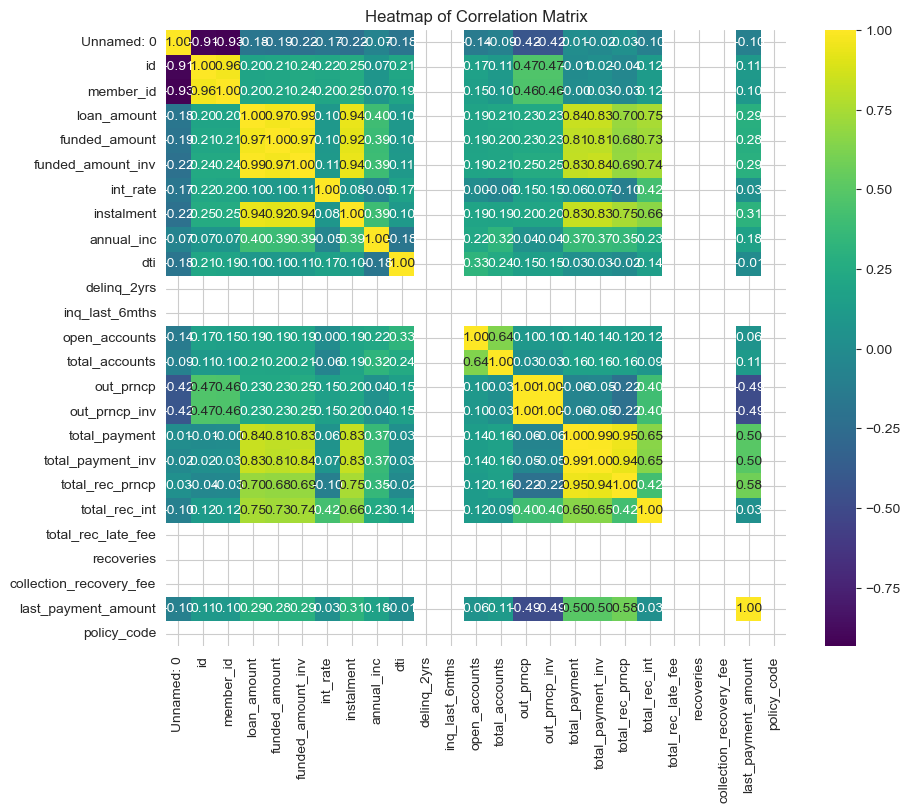

In [82]:
plotter.heatmap() # visualize as heatmap

In [83]:
corr_mask = (df_t6_corr_matrix.abs() > 0.9) & (df_t6_corr_matrix != 1) 
# 0.9 chosen as corr threshold.
# Mask created excluding any below 0.9 corr and nothing = 1 (direct corr). 


df_t6_highly_corr_pairs = corr_mask.stack()
# mask turned to stack form as easier to modify. 

# Filter pairs that are True (i.e., highly correlated)
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs[df_t6_highly_corr_pairs].index # index added. 
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs.drop("id") # 'id' dropped as is abitary. 
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs.drop("member_id") # member id dropped for same reason.
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs.drop("Unnamed: 0") # unsure what this is data artifact? dopped. 

print("correlation > 0.9):")
print("\r")
for col1, col2 in df_t6_highly_corr_pairs: 
    print(f"{col1} & {col2}") # printed as highly corr pairs. 


correlation > 0.9):

loan_amount & funded_amount
loan_amount & funded_amount_inv
loan_amount & instalment
funded_amount & loan_amount
funded_amount & funded_amount_inv
funded_amount & instalment
funded_amount_inv & loan_amount
funded_amount_inv & funded_amount
funded_amount_inv & instalment
instalment & loan_amount
instalment & funded_amount
instalment & funded_amount_inv
out_prncp & out_prncp_inv
out_prncp_inv & out_prncp
total_payment & total_payment_inv
total_payment & total_rec_prncp
total_payment_inv & total_payment
total_payment_inv & total_rec_prncp
total_rec_prncp & total_payment
total_rec_prncp & total_payment_inv


In [85]:
print(df_t6_highly_corr_pairs) # printed as list for verification. 

MultiIndex([(      'loan_amount',     'funded_amount'),
            (      'loan_amount', 'funded_amount_inv'),
            (      'loan_amount',        'instalment'),
            (    'funded_amount',       'loan_amount'),
            (    'funded_amount', 'funded_amount_inv'),
            (    'funded_amount',        'instalment'),
            ('funded_amount_inv',       'loan_amount'),
            ('funded_amount_inv',     'funded_amount'),
            ('funded_amount_inv',        'instalment'),
            (       'instalment',       'loan_amount'),
            (       'instalment',     'funded_amount'),
            (       'instalment', 'funded_amount_inv'),
            (        'out_prncp',     'out_prncp_inv'),
            (    'out_prncp_inv',         'out_prncp'),
            (    'total_payment', 'total_payment_inv'),
            (    'total_payment',   'total_rec_prncp'),
            ('total_payment_inv',     'total_payment'),
            ('total_payment_inv',   'total_rec_p

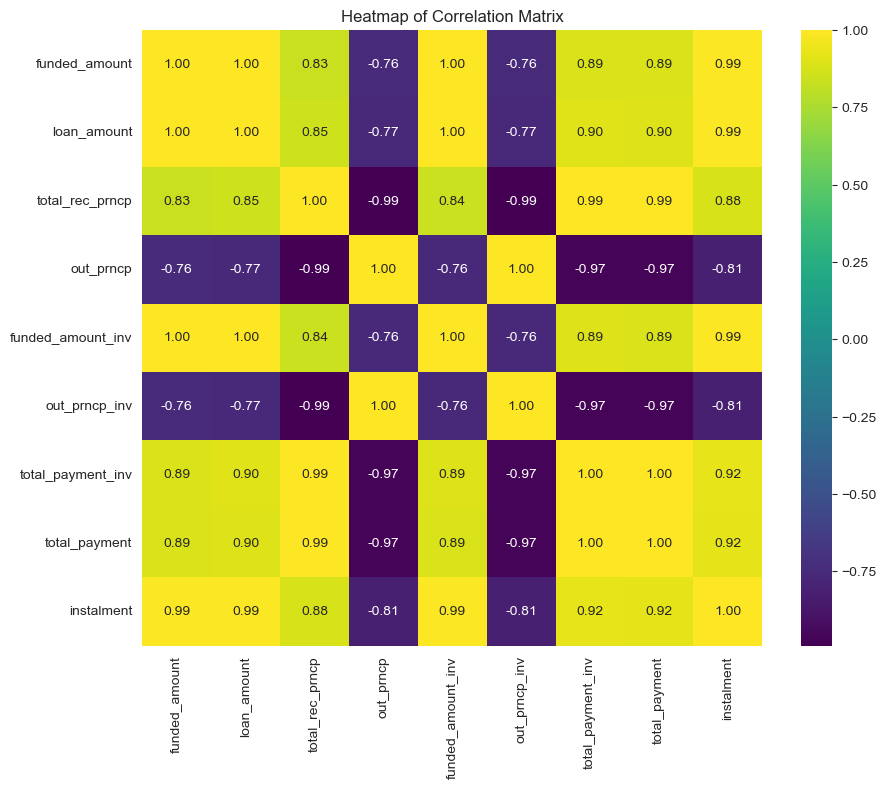

In [86]:
columns_to_keep = set() 
for pair in df_t6_highly_corr_pairs:
    for col in pair:
        columns_to_keep.add(col)
# create set and add all columns in highly corr list, this will drop duplicates. 

df_t6_corr_cols = df_t6_num[list(columns_to_keep)] # reformat back to list. 

df_t6_filtered_corr_matrix = df_t6_corr_cols.corr() # corr matrix created. 


corr_plotter = Plotter(df_t6_filtered_corr_matrix) # plotter instance of corr matrix created. 

corr_plotter.heatmap() # heatmap of highly corr columns. 


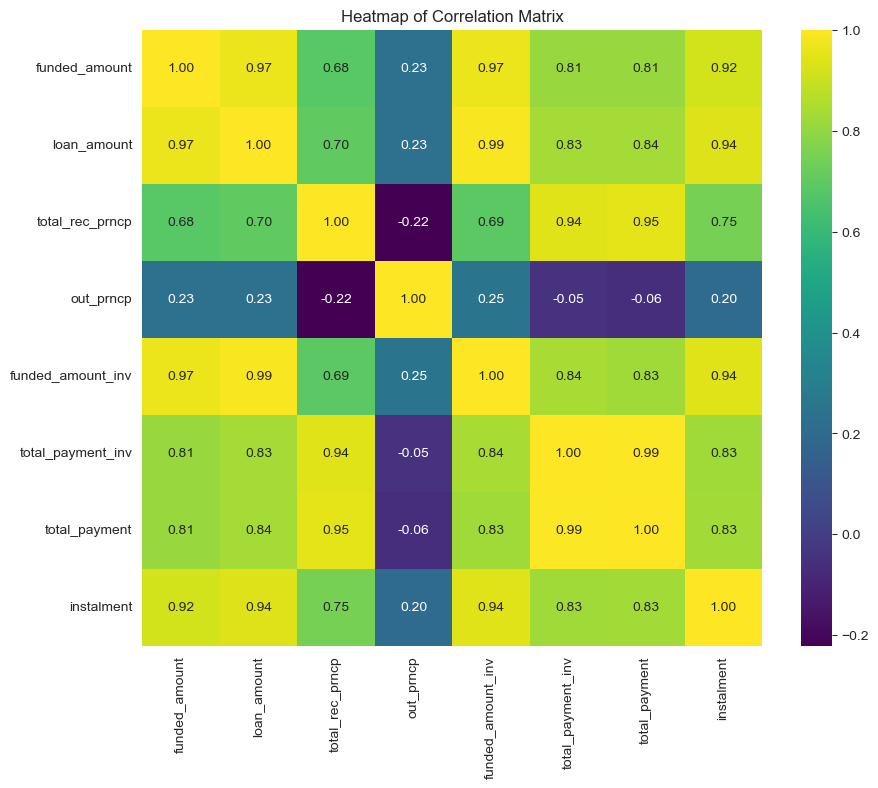

In [87]:
df_t6_corr_cols_dropped1 = df_t6_corr_cols.drop(columns="out_prncp_inv")
# 'out_prncp_inv' & 'out_prncp' essentially 1-1 correlated, so will drop 1. 

df_t6_corr_matrix_dropped1 = df_t6_corr_cols_dropped1.corr() 
# new corr matrix with dropped col. 

corr_plotter1 = Plotter(df_t6_corr_cols_dropped1)
# new df, plotter instance created. 

corr_plotter1.heatmap() # heatmap.

In [88]:
print("Correlation Matrix Before Stacking:") # vislizing df with dropped columns in df format. 
print(df_t6_corr_matrix_dropped1)

Correlation Matrix Before Stacking:
                   funded_amount  loan_amount  total_rec_prncp  out_prncp  \
funded_amount           1.000000     0.965857         0.683111   0.229643   
loan_amount             0.965857     1.000000         0.703917   0.227770   
total_rec_prncp         0.683111     0.703917         1.000000  -0.220843   
out_prncp               0.229643     0.227770        -0.220843   1.000000   
funded_amount_inv       0.965275     0.987099         0.692608   0.247288   
total_payment_inv       0.810924     0.834101         0.938112  -0.046443   
total_payment           0.812419     0.836681         0.948338  -0.059661   
instalment              0.918389     0.936909         0.745300   0.202574   

                   funded_amount_inv  total_payment_inv  total_payment  \
funded_amount               0.965275           0.810924       0.812419   
loan_amount                 0.987099           0.834101       0.836681   
total_rec_prncp             0.692608           0

In [89]:
df_t6_corr_cols_dropped1_stack = df_t6_corr_matrix_dropped1.stack() # stack new df. 

df_t6_corr_cols_drpd1_stkd_filt = df_t6_corr_cols_dropped1_stack[
    (df_t6_corr_cols_dropped1_stack.abs() > 0.9) & (df_t6_corr_cols_dropped1_stack != 1)
] # created 0.9 corr mask again. 

print("correlation > 0.9):")
print("\r")
print(df_t6_corr_cols_drpd1_stkd_filt)
# visualize each col exact corr matrix score in easy format. 
# no 'out_prncp' anymore. 

correlation > 0.9):

funded_amount      loan_amount          0.965857
                   funded_amount_inv    0.965275
                   instalment           0.918389
loan_amount        funded_amount        0.965857
                   funded_amount_inv    0.987099
                   instalment           0.936909
total_rec_prncp    total_payment_inv    0.938112
                   total_payment        0.948338
funded_amount_inv  funded_amount        0.965275
                   loan_amount          0.987099
                   instalment           0.938748
total_payment_inv  total_rec_prncp      0.938112
                   total_payment        0.990744
total_payment      total_rec_prncp      0.948338
                   total_payment_inv    0.990744
instalment         funded_amount        0.918389
                   loan_amount          0.936909
                   funded_amount_inv    0.938748
dtype: float64


In [90]:
df_t6_corr_cols_dropped2 = df_t6_corr_cols_dropped1.drop(columns="out_prncp") 
#removed for clarity, will not be removed from final df

print(df_t6_corr_cols_dropped2)

       funded_amount  loan_amount  total_rec_prncp  funded_amount_inv  \
0            16000.0      16000.0          4787.06           16000.00   
1            12000.0      12000.0          2004.28           12000.00   
2            15000.0      15000.0          4338.36           15000.00   
3             8950.0       8950.0          2472.75            8950.00   
4            20000.0      20000.0          3038.19           20000.00   
...              ...          ...              ...                ...   
32981         1200.0       1200.0          1200.00             950.00   
32982         3600.0       3600.0          3600.00              25.00   
32983         8000.0       8000.0          8000.00            1369.99   
32984         4800.0       4800.0          4800.00            3075.00   
32985         4000.0       4000.0          4000.00            3575.00   

       total_payment_inv  total_payment  instalment  
0                6220.99        6220.99      519.97  
1              

In [91]:
class CorralationAnalysis:
    def __init__(self, dataframe):
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.dataframe = dataframe

    def run_regression(self, target, predictors):
        X = self.dataframe[predictors]
        y = self.dataframe[target]
        X_const = sm.add_constant(X)
        model = sm.OLS(y, X_const).fit()
        results = {
            "Coefficients": model.params.to_dict(),
            "P_values": model.pvalues.to_dict(),
            "R_squared": model.rsquared,
            "Adjusted_R_squared": model.rsquared_adj,
            "Summary": model.summary()
        } 
        return results

    def calculate_vif(self, predictors):  
        X = self.dataframe[predictors] 
        X_const = sm.add_constant(X)  
        vif_data = pd.DataFrame()  
        vif_data["Variable"] = predictors 
        vif_data["VIF"] = [
            variance_inflation_factor(X_const.values, i + 1)
            for i in range(len(predictors))
        ] 
        return vif_data

    def rotational_analysis(self, group_columns):
        results = []
        for target in group_columns:
            predictors = [col for col in group_columns if col != target]
            regression_result = self.run_regression(target, predictors)
            vif_result = self.calculate_vif(predictors)
            print("\r")
            results.append({
                "Target": target,
                "Predictors": predictors,
                "Regression": regression_result,
                "VIF": vif_result
            })
        return results
    
    def generate_summary_table(self, group_columns):
      summary_data = []  
      analysis_results = self.rotational_analysis(group_columns) 

      for result in analysis_results:
        target = result["Target"] 
        predictors = result["Predictors"]
        p_values = result["Regression"]["P_values"]

        target_vif_values = [] 
        target_p_values = [] 

        for predictor in predictors:
            vif_result = self.calculate_vif(predictors)
            vif_value = vif_result.loc[vif_result["Variable"] == predictor, "VIF"].iloc[0]
            p_value = p_values[predictor]

            target_vif_values.append(vif_value)
            target_p_values.append(p_value)
            
            summary_data.append({
                "Target": target,
                "Predictor": predictor,
                "P_value": p_value,
                "VIF": vif_value
            }) 
        
        mean_vif = np.mean(target_vif_values) 
        mean_p_value = np.mean(target_p_values) 

        summary_data.append({
            "Target": target,
            "Predictor": "Mean (All Predictors)",
            "P_value": mean_p_value,
            "VIF": mean_vif
        }) 
    
      return pd.DataFrame(summary_data)
    

In [92]:
"""
Having a look at the corralation heatmap and corr matrix there are two main 'blocks' of 
highly corralated cols, all above the 0.9 threshold that interact with each other.
Here I have seperated them into two groups for seperate analysis.

"""

corr_group1 = ["instalment", "loan_amount", "funded_amount", "funded_amount_inv"] 


corr_group2 = ["total_payment" , "total_payment_inv" , "total_rec_prncp"] 

In [93]:
corr_analysis = CorralationAnalysis(df_t6_corr_cols_dropped2) # instance of Class. 

In [94]:
corr_analysis.generate_summary_table(corr_group1) # corr analysis table.

,Target,Predictor,P_value,VIF
0,instalment,loan_amount,2.411180e-171,43.205881
1,instalment,funded_amount,4.233969e-52,16.229403
2,instalment,funded_amount_inv,0.000000e+00,42.493448
3,instalment,Mean (All Predictors),1.411323e-52,33.976244
4,loan_amount,instalment,2.411180e-171,8.579553
5,loan_amount,funded_amount,0.000000e+00,14.929032
6,loan_amount,funded_amount_inv,0.000000e+00,19.682314
7,loan_amount,Mean (All Predictors),8.037268e-172,14.396966
8,funded_amount,instalment,4.233969e-52,8.723278
9,funded_amount,loan_amount,0.000000e+00,40.409830


In [95]:
corr_analysis_g1mean = corr_analysis.generate_summary_table(corr_group1) # summary table.

corr_analyis_g1mean = corr_analysis_g1mean[corr_analysis_g1mean["Predictor"] == "Mean (All Predictors)"]
# filter for just mean. 

print(corr_analyis_g1mean)







               Target              Predictor        P_value        VIF
3          instalment  Mean (All Predictors)   1.411323e-52  33.976244
7         loan_amount  Mean (All Predictors)  8.037268e-172  14.396966
11      funded_amount  Mean (All Predictors)   1.411323e-52  30.238933
15  funded_amount_inv  Mean (All Predictors)   0.000000e+00  14.374554


In [47]:
corr_analysis.generate_summary_table(corr_group2) # same for group 2

,Target,Predictor,P_value,VIF
0,total_payment,total_payment_inv,0.000000e+00,8.337042
1,total_payment,total_rec_prncp,0.000000e+00,8.337042
2,total_payment,Mean (All Predictors),0.000000e+00,8.337042
3,total_payment_inv,total_payment,0.000000e+00,9.934854
4,total_payment_inv,total_rec_prncp,9.904981e-10,9.934854
5,total_payment_inv,Mean (All Predictors),4.952491e-10,9.934854
6,total_rec_prncp,total_payment,0.000000e+00,54.272987
7,total_rec_prncp,total_payment_inv,9.904981e-10,54.272987
8,total_rec_prncp,Mean (All Predictors),4.952491e-10,54.272987


In [96]:
corr_analysis_g2mean = corr_analysis.generate_summary_table(corr_group2)


corr_analysis_g2mean = corr_analysis_g2mean[corr_analysis_g2mean["Predictor"] == "Mean (All Predictors)"]


print(corr_analysis_g2mean)





              Target              Predictor       P_value        VIF
2      total_payment  Mean (All Predictors)  0.000000e+00   8.337042
5  total_payment_inv  Mean (All Predictors)  4.952491e-10   9.934854
8    total_rec_prncp  Mean (All Predictors)  4.952491e-10  54.272987


In [97]:
df_t6_corr_grp1 = df_t6_corr_cols_dropped2.drop(columns=["total_payment", "total_payment_inv", "total_rec_prncp"])

df_t6_corr_grp2 = df_t6_corr_cols_dropped2.drop(columns=["instalment", "loan_amount", "funded_amount", "funded_amount_inv"])

"""
Create a df exlcusively of each block for analysis.

"""

'\nCreate a df exlcusively of each block for analysis.\n\n'

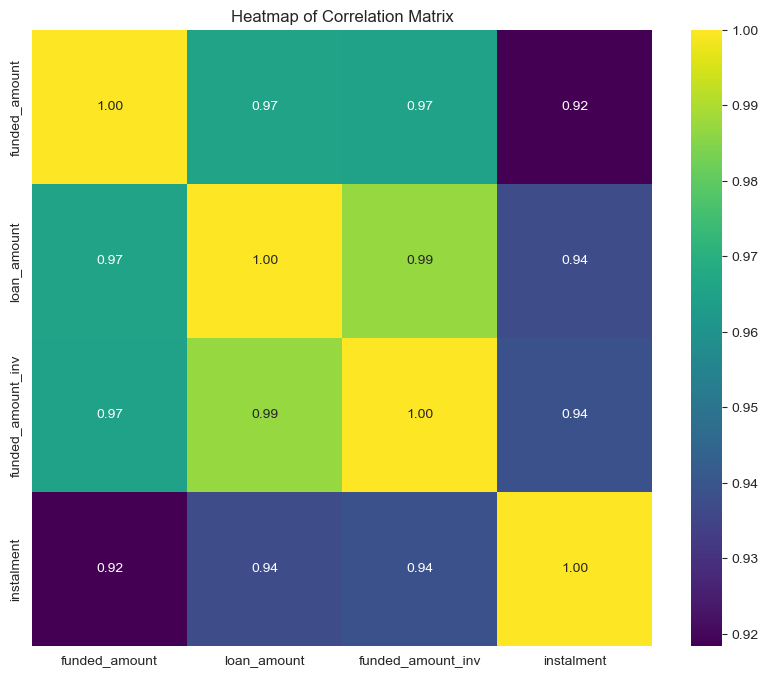

In [98]:
group1_only = Plotter(df_t6_corr_grp1) 

group1_only.heatmap() # group 1 heatmap.

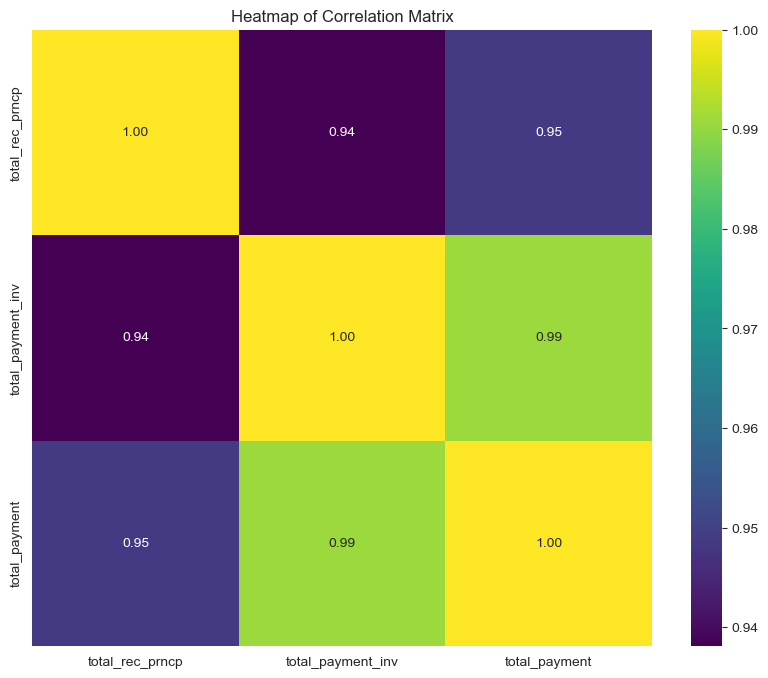

In [99]:
group2_only = Plotter(df_t6_corr_grp2)

group2_only.heatmap() # group 2 heatmap. 

In [100]:
df_t6_grp1_drpd1 = df_t6_corr_grp1.drop(columns="funded_amount_inv")

df_t6_grp1_drpd2 = df_t6_corr_grp2.drop(columns="total_rec_prncp") 

"""
group 1 funded_amount_inv decided to drop. second highest vif, extremly low p value
and corralted with loan amount, which I feel is the most intuative to keep. 

group 2 'total_rec_prncp decided to drop, as has the highest vif, at 50,
by over 4 times the other values.

"""

"\ngroup 1 funded_amount_inv decided to drop. second highest vif, extremly low p value\nand corralted with loan amount, which I feel is the most intuative to keep. \n\ngroup 2 'total_rec_prncp decided to drop, as has the highest vif, at 50,\nby over 4 times the other values.\n\n"

In [102]:
plotter_grp1 = Plotter(df_t6_grp1_drpd1)

plotter_grp2 = Plotter(df_t6_grp1_drpd2)

# new plotter instances with updated df.

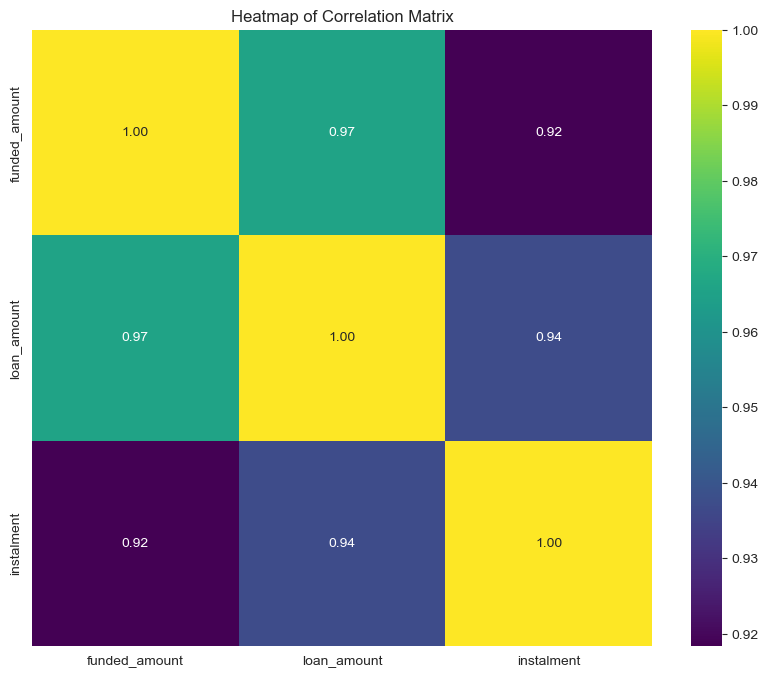

In [103]:
plotter_grp1.heatmap() # group 1 heatmap. 

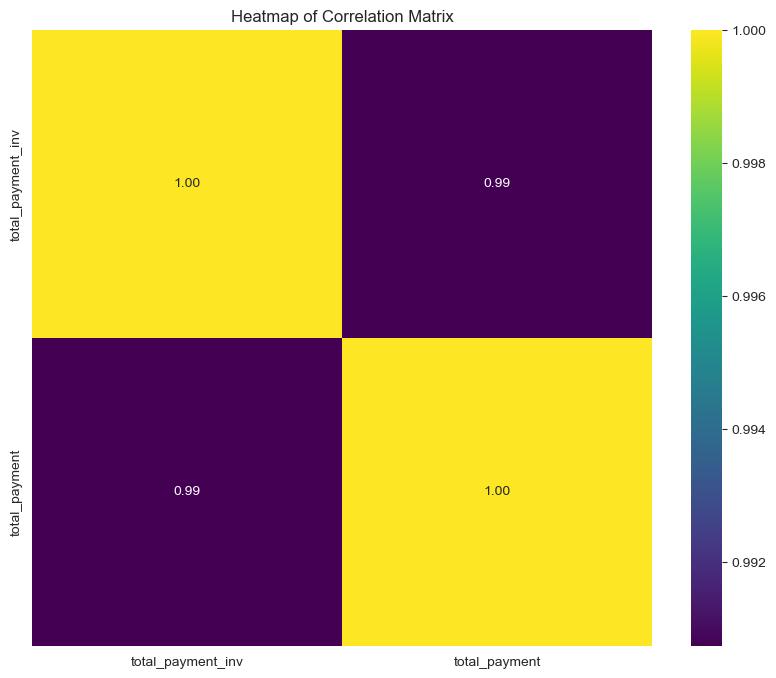

In [104]:
plotter_grp2.heatmap() # group 2 new heatmap. 

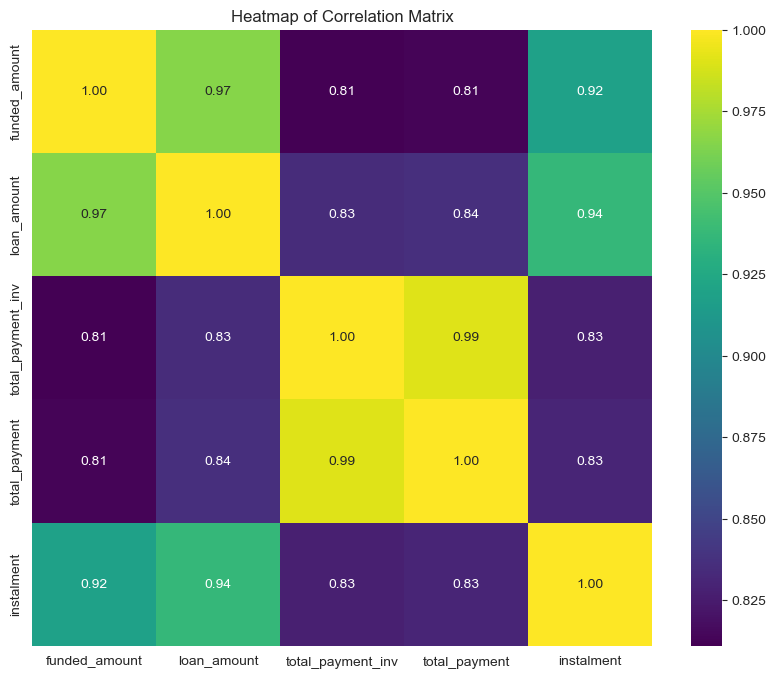

In [105]:
df_t6_corr_cols_dropped4 = df_t6_corr_cols_dropped2.drop(columns=["funded_amount_inv", "total_rec_prncp"])

plotter_dropped4 = Plotter(df_t6_corr_cols_dropped4)

plotter_dropped4.heatmap() # heatmap new full df with both dropped cols. 

In [106]:
corr_analysis_2 = CorralationAnalysis(df_t6_corr_cols_dropped4) # new Class instance. 

corr2_group1 = ["instalment", "loan_amount", "funded_amount"] # updated new group 1.

corr2_group2 = ["total_payment" , "total_payment_inv"] # updated new group 1.

In [107]:
corr_analysis_2.generate_summary_table(corr2_group1) 

,Target,Predictor,P_value,VIF
0,instalment,loan_amount,0.000000e+00,14.898739
1,instalment,funded_amount,1.920068e-162,14.898739
2,instalment,Mean (All Predictors),9.600341e-163,14.898739
3,loan_amount,instalment,0.000000e+00,6.387297
4,loan_amount,funded_amount,0.000000e+00,6.387297
5,loan_amount,Mean (All Predictors),0.000000e+00,6.387297
6,funded_amount,instalment,1.920068e-162,8.183246
7,funded_amount,loan_amount,0.000000e+00,8.183246
8,funded_amount,Mean (All Predictors),9.600341e-163,8.183246


In [108]:
corr2_analysis_g1mean = corr_analysis.generate_summary_table(corr2_group1)


corr2_analysis_g1mean = corr2_analysis_g1mean[corr2_analysis_g1mean["Predictor"] == "Mean (All Predictors)"]


print(corr2_analysis_g1mean)




          Target              Predictor        P_value        VIF
2     instalment  Mean (All Predictors)  9.600341e-163  14.898739
5    loan_amount  Mean (All Predictors)   0.000000e+00   6.387297
8  funded_amount  Mean (All Predictors)  9.600341e-163   8.183246


In [109]:
corr_analysis_2.generate_summary_table(corr2_group2) 

,Target,Predictor,P_value,VIF
0,total_payment,total_payment_inv,0.0,1.0
1,total_payment,Mean (All Predictors),0.0,1.0
2,total_payment_inv,total_payment,0.0,1.0
3,total_payment_inv,Mean (All Predictors),0.0,1.0


In [110]:
corr2_analysis_g2mean = corr_analysis.generate_summary_table(corr2_group2)


corr2_analysis_g2mean = corr2_analysis_g2mean[corr2_analysis_g2mean["Predictor"] == "Mean (All Predictors)"]


print(corr2_analysis_g2mean)



              Target              Predictor  P_value  VIF
1      total_payment  Mean (All Predictors)      0.0  1.0
3  total_payment_inv  Mean (All Predictors)      0.0  1.0


In [111]:
df_t6_corr_cols_dropped5 = df_t6_corr_cols_dropped4.drop(columns="total_payment_inv")
# p value of 0 indicates infintely small and vif of one means almost complete corralation.
# dropped 'total_payment_inv" from df as "total_payment" seems more intuative and intregral. 

df_t6_corr_cols_dropped6 = df_t6_corr_cols_dropped5.drop(columns="instalment")
# installment dropped in the df as it has the highest vif. 

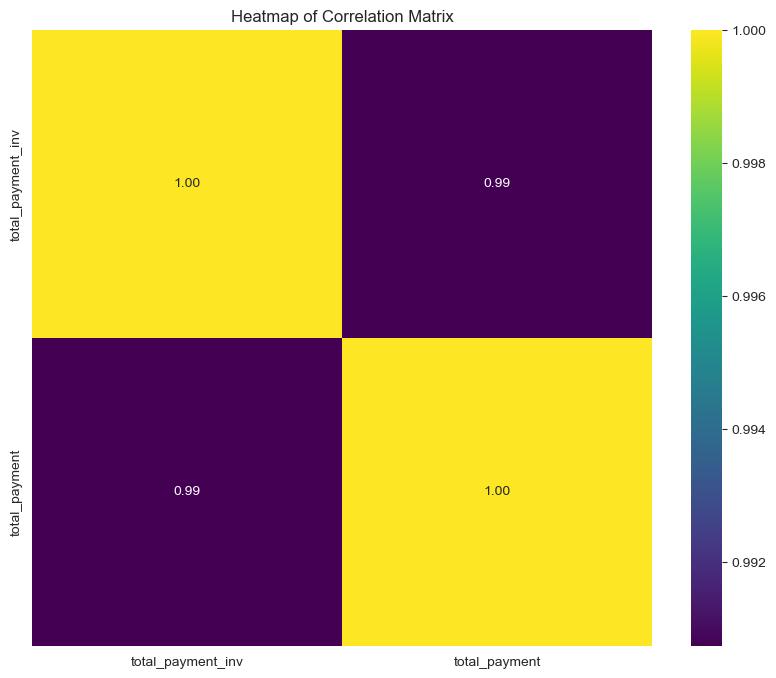

In [112]:
df_t6_grp1_drp2 = df_t6_grp1_drpd1.drop(columns="instalment")
# installment dropped in the group to vsiaulize the remaining.

plotter_grp1_drpd2 = Plotter(df_t6_grp1_drpd2)

plotter_grp1_drpd2.heatmap() # heatmap of remaining 2. 

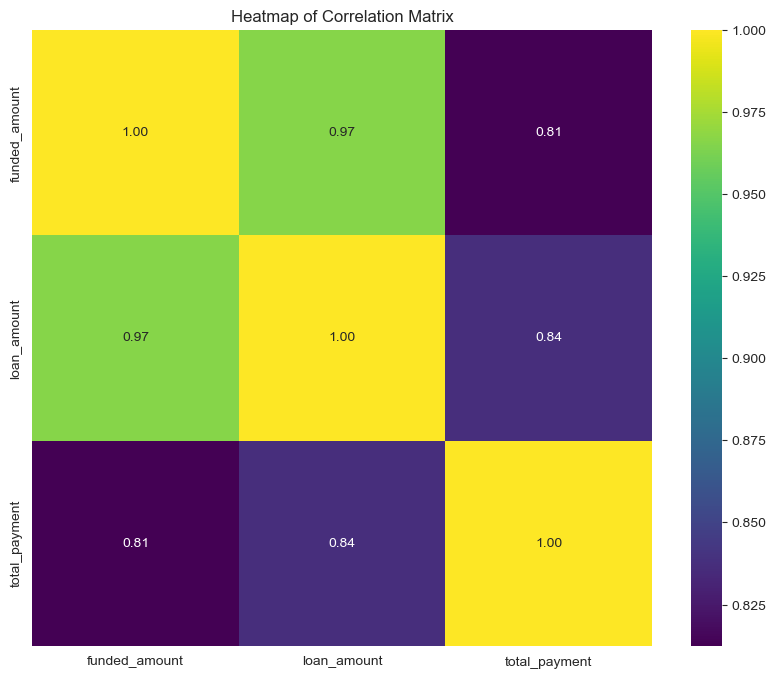

In [113]:
plotter_drpd6 = Plotter(df_t6_corr_cols_dropped6)

plotter_drpd6.heatmap()

In [114]:
df_t6_fin = df_t6_corr_cols_dropped6.drop(columns="funded_amount")
# funded amount dropped as loan_amount seems more important to keep. 

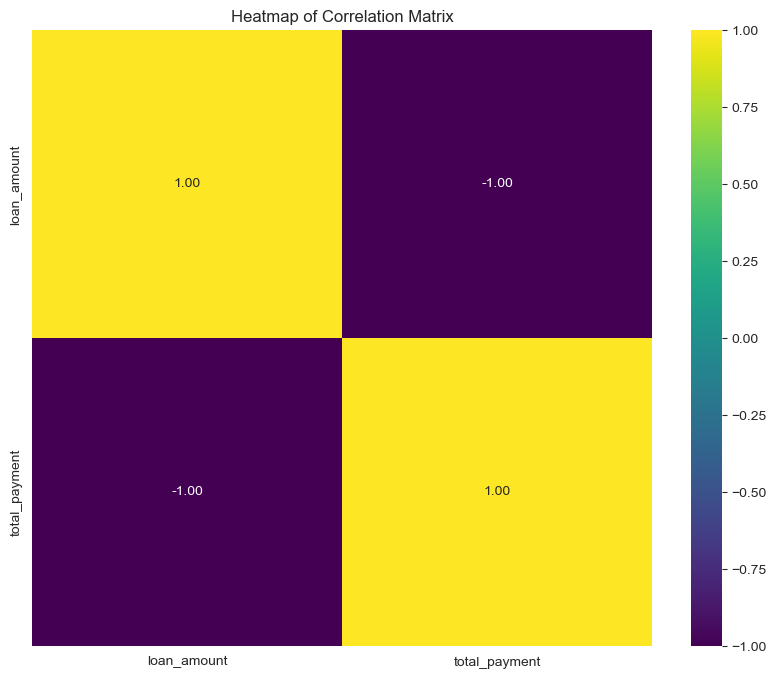

In [115]:
tf_t6_fin_corr_matrix = df_t6_fin.corr() 

plotter_fin = Plotter(tf_t6_fin_corr_matrix)

plotter_fin.heatmap() # perfect negative corralation not sure if this false fitting because rest of columns dropped. 

List of columns I need to drop:

out_prncp_inv,
instalment,
funded_amount,
funded_amount_inv,
total_payment_inv,
total_rec_prncp,


In [120]:
print(df_t6)

       Unnamed: 0        id  member_id  loan_amount  funded_amount  \
0            4203  17382831   19505381      16000.0        16000.0   
1            4204  15309436   17381884      12000.0        12000.0   
2            4205  14469434   16531751      15000.0        15000.0   
3            4207  13297208   15339420       8950.0         8950.0   
4            4208  12316972   14309119      20000.0        20000.0   
...           ...       ...        ...          ...            ...   
32981       54137    130699     130690       1200.0         1200.0   
32982       54142    130654     129275       3600.0         3600.0   
32983       54150    143128     128262       8000.0         8000.0   
32984       54165    124436     124430       4800.0         4800.0   
32985       54178    120215     118760       4000.0         4000.0   

       funded_amount_inv       term   int_rate  instalment grade  ...  \
0               16000.00  36 months  10.490000      519.97     B  ...   
1            

In [124]:
confirm_dtypes = df_t6.dtypes

print(confirm_dtypes)


Unnamed: 0                             int64
id                                     int64
member_id                              int64
loan_amount                          float64
funded_amount                        float64
funded_amount_inv                    float64
term                                category
int_rate                             float64
instalment                           float64
grade                               category
sub_grade                           category
employment_length                   category
home_ownership                      category
annual_inc                           float64
verification_status                 category
issue_date                    datetime64[ns]
loan_status                         category
payment_plan                            bool
purpose                             category
dti                                  float64
delinq_2yrs                            int64
earliest_credit_line          datetime64[ns]
inq_last_6

In [128]:
df_t6_corr_drpd = df_t6.drop(columns=["out_prncp_inv",
                                       "instalment",
                                       "funded_amount",
                                       "funded_amount_inv",
                                       "total_payment_inv",
                                       "total_rec_prncp"])
# selected cols dropped from db.

print(df_t6_corr_drpd)

       Unnamed: 0        id  member_id  loan_amount       term   int_rate  \
0            4203  17382831   19505381      16000.0  36 months  10.490000   
1            4204  15309436   17381884      12000.0  60 months   8.670000   
2            4205  14469434   16531751      15000.0  36 months  13.507328   
3            4207  13297208   15339420       8950.0  36 months  17.860000   
4            4208  12316972   14309119      20000.0  60 months  12.990000   
...           ...       ...        ...          ...        ...        ...   
32981       54137    130699     130690       1200.0  36 months  13.507328   
32982       54142    130654     129275       3600.0  36 months  11.220000   
32983       54150    143128     128262       8000.0  36 months  11.540000   
32984       54165    124436     124430       4800.0  36 months  11.220000   
32985       54178    120215     118760       4000.0  36 months   7.430000   

      grade sub_grade employment_length home_ownership  ...  total_rec_int 

In [129]:
df_t6_fin_num = df_t6_corr_drpd.select_dtypes(include=[np.number]) # 

df_t6_fin_num_dtypes = df_t6_fin_num.dtypes
print(df_t6_fin_num_dtypes)


Unnamed: 0                   int64
id                           int64
member_id                    int64
loan_amount                float64
int_rate                   float64
annual_inc                 float64
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_accounts                int64
total_accounts               int64
out_prncp                  float64
total_payment              float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_payment_amount        float64
policy_code                  int64
dtype: object


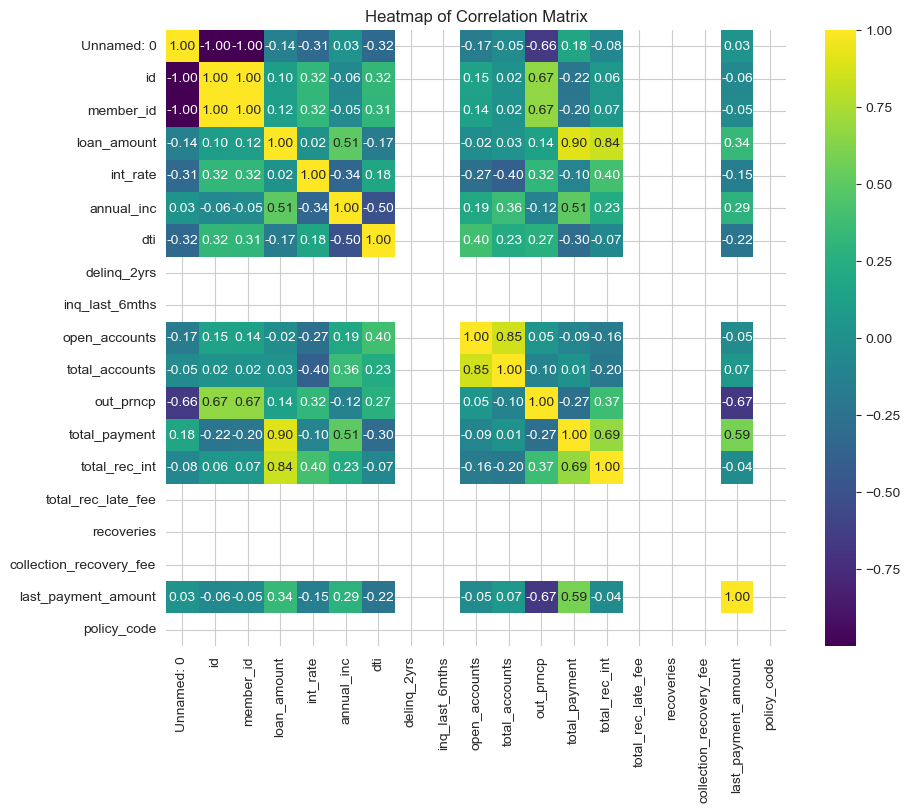

In [130]:
final_corr = df_t6_fin_num.corr()

final_plotter = Plotter(final_corr)

final_plotter.heatmap()

Here we can see that loan_amount and total_payment, don't highly correlate with anything but each other,
and that they are on the threshold of 90, so I will leave. Everything else is now below a 90 corralation. 

In [131]:
df_t6_corr_drpd.to_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df6_corr_drpd.csv")